In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange

In [12]:
class LSBandit:
    def __init__(self, dim: int, rng: np.random.RandomState, noise_scale: float = 0.1):
        self.dim = dim
        self.rng = rng
        
        self.noise_scale = noise_scale
        self.theta = np.zeros(self.dim)
        self.theta[0] = 1.
    
    def pull(self, action: np.ndarray):
        return np.dot(self.theta, action) + self.rng.normal(loc=0., scale=self.noise_scale)
        

In [13]:
def beta(delta: float, t: int, d: int, lamb: float = 1., S: int = 1, R: int = 1, ):
    return R * np.sqrt(d * np.log(lamb + t) - d * np.log(lamb) - 2 * np.log(delta)) + np.sqrt(lamb) * S

In [30]:
dimension = 5
lamb = 1
total_eps = int(1e4)
seed = 2020
bandit_noise_scale = 0.1

rng = np.random.RandomState(seed)

bandit = LSBandit(dimension, rng, noise_scale=bandit_noise_scale)

theta = np.zeros(dimension)
cov_start = np.identity(dimension) * lamb
cov = cov_start.copy()

xs = 0
regret = 0
rsxs = np.zeros_like(theta)

all_regret = []
cum_regret = []
all_actions_first = []
inv = cov

for t in trange(1, total_eps + 1):
    # Thomson sampling
    delta = 1/dimension
    
    b = beta(delta, t, dimension)
    theta_hat = theta + b * rng.multivariate_normal(np.zeros(dimension), inv)
    

    # Argmax over arms
    x_t = theta_hat / np.linalg.norm(theta_hat, ord=2)
    
    # Pull the bandit
    r_t = bandit.pull(x_t)
    all_actions_first.append(x_t[0])
    regret = 1 - np.dot(bandit.theta, x_t)
    if len(cum_regret) > 1:
        cum_regret.append(regret + cum_regret[-1])
    else:
        cum_regret.append(regret)
        
    all_regret.append(regret)
    
    # Updating parameters
    cov += np.outer(x_t, x_t)
    rsxs += x_t*r_t
    
    inv = np.linalg.inv(cov)
    theta = np.matmul(inv, rsxs)
    
    # Plotting
#     if t % 1000 == 0:
#         print(f"step: {t}\n"
#               f"beta: {b}\n"
#               f"theta_hat: {theta_hat}\n"
#               f"x_t: {x_t}\n"
#               f"cov: {cov}\n"
#               f"theta: {theta}\n")

    
    


  0%|          | 0/10000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


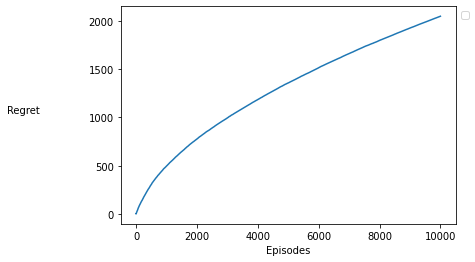

In [31]:
regret = np.array(cum_regret)
x = np.arange(regret.shape[0])
fig, ax = plt.figure(), plt.axes()

ax.plot(x, regret)

ax.set_xlabel('Episodes')
ax.set_ylabel(f"Regret", rotation=0, labelpad=65)
# ax.set_title(f'Discounted episodic returns over environment steps (Prefilled ratio = 0.0)')
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

In [21]:
all_actions_first[-100:]

[0.5037496318907315,
 0.7335901888207,
 0.8540067369900171,
 0.6922477720281625,
 0.6037456327564211,
 0.2701704522435865,
 0.10967998325471602,
 0.4114972439304446,
 -0.539589190445843,
 0.45369416585251127,
 0.4662668275002096,
 0.0029637766226024587,
 0.9456868916899849,
 0.7060240415152021,
 0.5634508638489611,
 0.15520142127597478,
 0.2750357154683671,
 0.0754202352801833,
 0.016399875943591026,
 -0.0982381215039443,
 0.3695544425930559,
 -0.03542719216255602,
 0.792856545797608,
 -0.28100434655125567,
 0.3949591467915414,
 0.1858073208757239,
 0.7235969494341176,
 -0.5544690570226114,
 -0.4289117151729031,
 -0.18113007647591664,
 -0.23929461575698244,
 0.013180675529539557,
 -0.47887470501648327,
 -0.41379158503005437,
 -0.11645532796778482,
 -0.2987690375115919,
 -0.2019713186671956,
 -0.5318388590218263,
 -0.9039565351492205,
 0.2022773282570425,
 -0.5292638136118671,
 0.7828936388077841,
 0.13776987422763587,
 -0.0726861100323459,
 0.2095777461751629,
 -0.18722151636835688,
 -